In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['axes.unicode_minus']=False

## 加载数据

In [2]:
data = np.load('../../data/国民经济核算季度数据.npz', allow_pickle=True)

## 绘制国内生产总值当季值散点图

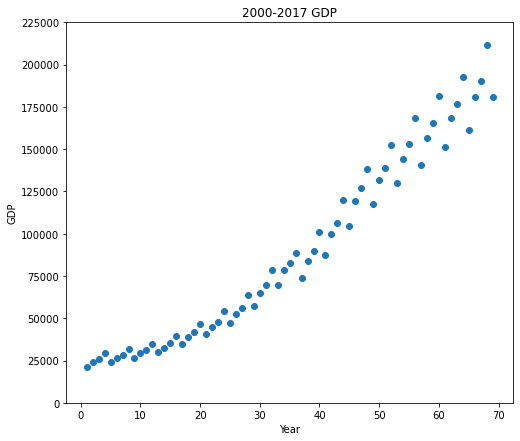

In [3]:
df = pd.DataFrame(data=data['values'], columns=data['columns'])
plt.figure(figsize=(8, 7))
plt.scatter(df.iloc[:, 0], df.iloc[:, 2], marker='o')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.ylim((0,225000))
plt.title('2000-2017 GDP')
plt.show()

## 预处理数据

In [4]:
gdp_df = pd.DataFrame()
gdp_df['year'] = df.iloc[:, 1].apply(lambda x: x[:4]).astype('int')
gdp_df['total_gdp'] = df.iloc[:, 2].astype('int')
gdp_df = gdp_df.iloc[:-1]

## 计算增长率

In [5]:
pdata = pd.DataFrame()
grouped = gdp_df.groupby('year')
pdata['total_gdp'] = grouped['total_gdp'].agg(np.sum)
prev_gdp = pdata['total_gdp'].shift(1).fillna(0)
pdata['growth_rate'] = (pdata['total_gdp'] - prev_gdp) / prev_gdp * 100
pdata = pdata[1:]

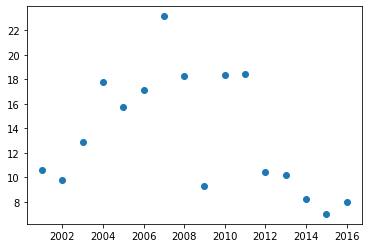

In [6]:
plt.scatter(pdata.index, pdata['growth_rate'])
plt.show()